In [17]:
import pandas

boston = pandas.read_csv('housing.csv')
# print(boston.head())

median_value = boston['MEDV']
print(median_value.head())

0    504000.0
1    453600.0
2    728700.0
3    701400.0
4    760200.0
Name: MEDV, dtype: float64


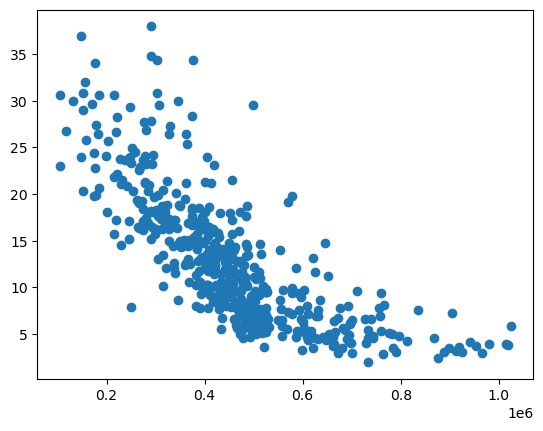

In [18]:
import matplotlib.pyplot

house_price = boston['MEDV']
lstat = boston['LSTAT']
matplotlib.pyplot.scatter(house_price, lstat)

In [20]:
import sklearn.linear_model

simple_model = sklearn.linear_model.LinearRegression()
print(median_value)
simple_model.fit(lstat, median_value)

0      504000.0
1      453600.0
2      728700.0
3      701400.0
4      760200.0
         ...   
484    470400.0
485    432600.0
486    501900.0
487    462000.0
488    249900.0
Name: MEDV, Length: 489, dtype: float64


ValueError: Expected 2D array, got 1D array instead:
array=[ 4.98  9.14  4.03  2.94  5.33  5.21 12.43 19.15 29.93 17.1  20.45 13.27
 15.71  8.26 10.26  8.47  6.58 14.67 11.69 11.28 21.02 13.83 18.72 19.88
 16.3  16.51 14.81 17.28 12.8  11.98 22.6  13.04 27.71 18.35 20.34  9.68
 11.41  8.77 10.13  4.32  1.98  4.84  5.81  7.44  9.55 10.21 14.15 18.8
 30.81 16.2  13.45  9.43  5.28  8.43 14.8   4.81  5.77  3.95  6.86  9.22
 13.15 14.44  6.73  9.5   8.05  4.67 10.24  8.1  13.09  8.79  6.72  9.88
  5.52  7.54  6.78  8.94 11.97 10.27 12.34  9.1   5.29  7.22  6.72  7.51
  9.62  6.53 12.86  8.44  5.5   5.7   8.81  8.2   8.16  6.21 10.59  6.65
 11.34  4.21  3.57  6.19  9.42  7.67 10.63 13.44 12.33 16.47 18.66 14.09
 12.27 15.55 13.   10.16 16.21 17.09 10.45 15.76 12.04 10.3  15.37 13.61
 14.37 14.27 17.93 25.41 17.58 14.81 27.26 17.19 15.39 18.34 12.6  12.26
 11.12 15.03 17.31 16.96 16.9  14.59 21.32 18.46 24.16 34.41 26.82 26.42
 29.29 27.8  16.65 29.53 28.32 21.45 14.1  13.28 12.12 15.79 15.12 15.02
 16.14  4.59  6.43  7.39  5.5  11.64  9.81 12.14 11.1  11.32 14.43 12.03
 14.69  9.04  9.64  5.33 10.11  6.29  6.92  5.04  7.56  9.45  4.82  5.68
 13.98 13.15  6.68  4.56  5.39  5.1   4.69  2.87  5.03  4.38  4.08  8.61
  6.62  4.56  4.45  7.43  3.11  3.81 10.87 10.97 18.06 14.66 23.09 17.27
 23.98 16.03  9.38 29.55  9.47 13.51  9.69 17.92 10.5   9.71 21.46  9.93
  7.6   4.14  3.13  6.36  3.92  3.76 11.65  5.25  2.47  3.95  8.05 10.88
  9.54  4.73  6.36  7.37 11.38 12.4  11.22  5.19 12.5  18.46  9.16 10.15
  9.52  6.56  5.9   3.59  3.53  3.54  6.57  9.25  3.11  7.79  6.9   9.59
  7.26  5.91 11.25  8.1  10.45 14.79  3.16 13.65 13.    6.59  7.73  6.58
  3.53  2.98  6.05  4.16  7.19  4.85  3.76  4.59  3.01  7.85  8.23 12.93
  7.14  7.6   9.51  3.33  3.56  4.7   8.58 10.4   6.27  7.39 15.84  4.97
  4.74  6.07  9.5   8.67  4.86  6.93  8.93  6.47  7.53  4.54  9.97 12.64
  5.98 11.72  7.9   9.28 11.5  18.33 15.94 10.36 12.73  7.2   6.87  7.7
 11.74  6.12  5.08  6.15 12.79  9.97  7.34  9.09 12.43  7.83  5.68  6.75
  8.01  9.8  10.56  8.51  9.74  9.29  5.49  8.65  7.18  4.61 10.53 12.67
  6.36  5.99  5.89  5.98  5.49  7.79  4.5   8.05  5.57 17.6  13.27 11.48
 12.67  7.79 14.19 10.19 14.64  7.12 14.   13.33 34.77 37.97 13.44 23.24
 21.24 23.69 21.78 17.21 21.08 23.6  24.56 30.63 30.81 28.28 31.99 30.62
 20.85 17.11 18.76 25.68 15.17 16.35 17.12 19.37 19.92 30.59 29.97 26.77
 20.32 20.31 19.77 27.38 22.98 23.34 12.13 26.4  19.78 10.11 21.22 34.37
 20.08 36.98 29.05 25.79 26.64 20.62 22.74 15.02 15.7  14.1  23.29 17.16
 24.39 15.69 14.52 21.52 24.08 17.64 19.69 12.03 16.22 15.17 23.27 18.05
 26.45 34.02 22.88 22.11 19.52 16.59 18.85 23.79 23.98 17.79 16.44 18.13
 19.31 17.44 17.73 17.27 16.74 18.71 18.13 19.01 16.94 16.23 14.7  16.42
 14.65 13.99 10.29 13.22 14.13 17.15 21.32 18.13 14.76 16.29 12.87 14.36
 11.66 18.14 24.1  18.68 24.91 18.03 13.11 10.74  7.74  7.01 10.42 13.34
 10.58 14.98 11.45 18.06 23.97 29.68 18.07 13.35 12.01 13.59 17.6  21.14
 14.1  12.92 15.1  14.33  9.67  9.08  5.64  6.48  7.88].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.